## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = r"Resources/Mouse_metadata.csv"
study_results_path = r"Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [3]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
clean_df["Mouse ID"].count()

1880

In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df['Tumor Volume (mm3)'].mean()
print(f"The mean Tumor Volume is {tumor_mean}")
tumor_median = clean_df['Tumor Volume (mm3)'].median()
print(f"The median of Tumor Volume is {tumor_median}")
tumor_mode = clean_df['Tumor Volume (mm3)'].mode()
print(f"The mode of Tumor Volume is {tumor_mode}")
tumor_var = clean_df['Tumor Volume (mm3)'].var()
print(f"The variance of Tumor Volume is {tumor_var}")
tumor_std = clean_df['Tumor Volume (mm3)'].std()
print(f"The standard deviation of Tumor Volume is {tumor_std}")
tumor_sem = clean_df['Tumor Volume (mm3)'].sem()
print(f"The standard error mean of Tumor Volume is {tumor_sem}")

The mean Tumor Volume is 50.43529323225536
The median of Tumor Volume is 48.933453655
The mode of Tumor Volume is 0    45.0
dtype: float64
The variance of Tumor Volume is 79.46290714557321
The standard deviation of Tumor Volume is 8.91419694339166
The standard error mean of Tumor Volume is 0.20559062186986257


In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
combined_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
combined_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
combined_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
combined_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
combined_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": combined_mean, "Median": combined_median, "Variance": combined_var, "Standard Deviation": combined_std, "SEM": combined_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_agg_df = summary_agg_df.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_agg_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

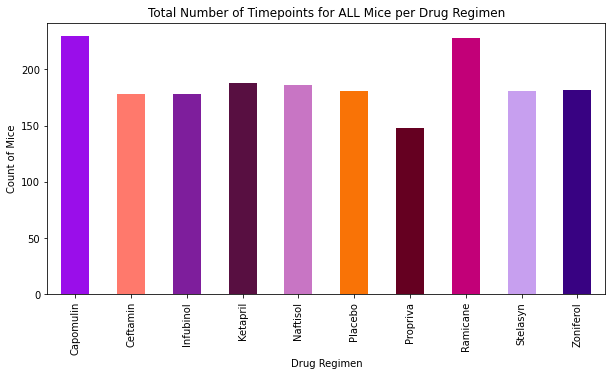

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_drug = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

my_colors = ["#9A0EEA", "#FF796C", "#7E1E9C", "#580F41", "#C875C4", "#F97306", "#650021", "#C20078", "#C79FEF", "#380282"]

mice_drug.plot(kind="bar", figsize=(10,5), color=my_colors)

plt.title("Total Number of Timepoints for ALL Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")

plt.show()
plt.tight_layout()

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

In [15]:
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

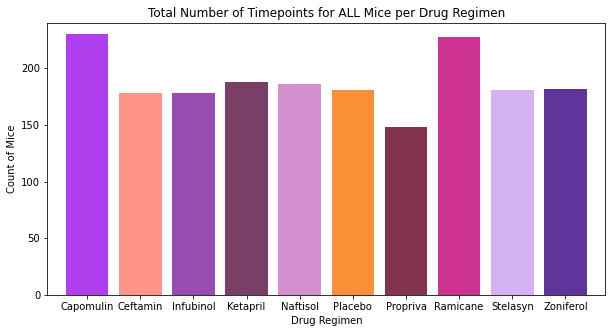

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = np.arange(len(mice_list))
fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.bar(x_axis, mice_list, color = my_colors, alpha = 0.8, align = 'center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_list)+10)

plt.title("Total Number of Timepoints for ALL Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")

plt.show()
plt.tight_layout()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [18]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,922
1,Male,958


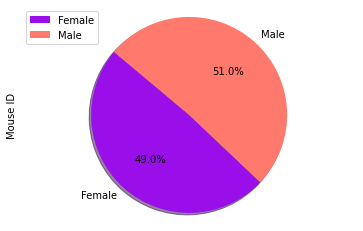

<Figure size 720x360 with 0 Axes>

In [19]:
# Plot Pie Chart
gender_df.plot(kind='pie', y = "Mouse ID", labels=gender_df["Sex"], autopct='%1.1f%%', colors = my_colors, shadow=True, startangle=140)
plt.axis("equal")
plt.figure(figsize=(10,5))
plt.show()

In [20]:
gender_count = (clean_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender_count

[922, 958]

In [21]:
labels = ["Female", "Male"]
colors = ["yellow","green"]
explode = (0.1,0)

<Figure size 720x360 with 0 Axes>

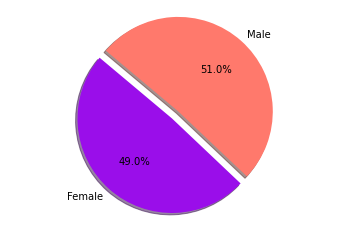

<Figure size 720x360 with 0 Axes>

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, explode=explode, labels=labels, colors=my_colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.figure(figsize=(10,5))

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [24]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = final_tumor.groupby(['Mouse ID'])['Timepoint'].max()

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint, final_tumor, on=['Timepoint', 'Mouse ID'], how='left')
merged_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
print(f"Lower Quartile: {lowerq}.")
upperq = quartiles[0.75]
print(f"Upper Quartile: {upperq}.")
iqr = upperq-lowerq
print(f"IQR: {iqr}.")

Lower Quartile: 37.1877438025.
Upper Quartile: 59.930261755.
IQR: 22.742517952499995.


In [27]:
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']    
ramicane_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_vol = merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# add subset 
tumor_vol_data = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ouliers using lower bounds: {lower_bound}.")
print(f"Ouliers using upper bounds: {upper_bound}.")    

Ouliers using lower bounds: 3.0739668737500097.
Ouliers using upper bounds: 94.04403868374999.


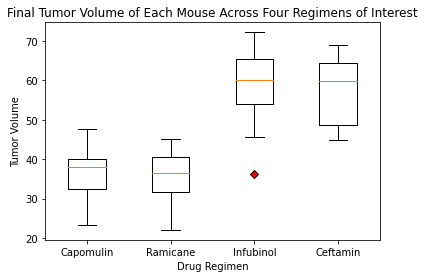

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')
labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

diamond = dict(markerfacecolor='r', marker='D')

ax1.boxplot(tumor_vol_data, flierprops=diamond, labels=labels)

plt.show()

## Line and Scatter Plots

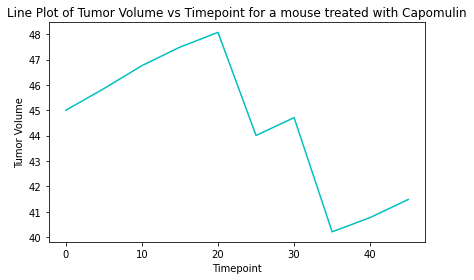

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_vol = clean_df.loc[clean_df['Mouse ID'] == 'l509']['Tumor Volume (mm3)'] 
cap_time = clean_df.loc[clean_df['Mouse ID'] == 'l509']['Timepoint']

plt.plot(cap_time, cap_vol, color = 'c') 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Line Plot of Tumor Volume vs Timepoint for a mouse treated with Capomulin')
plt.tight_layout()
plt.show()

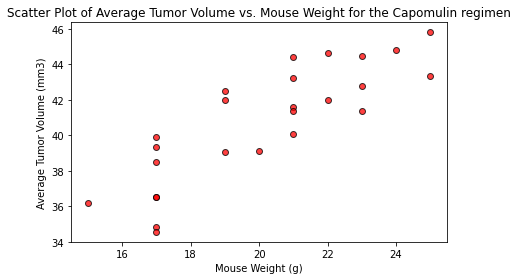

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin'])]

data_df = cap_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

avg_tumor_vol = data_df.groupby(data_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

mouse_weight = data_df.groupby(data_df["Mouse ID"])["Weight (g)"].mean()

plt.scatter(mouse_weight,avg_tumor_vol, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Scatter Plot of Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.tight_layout()
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}.")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


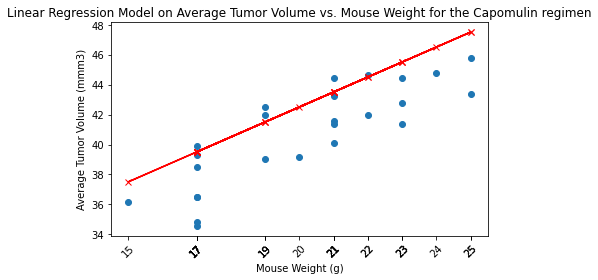

In [32]:
# Perform a linear regression model on average tumor volume vs. mouse weight for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
# Get regression values
regress_values = mouse_weight + slope + intercept

# PLot regression model
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, marker="x", color="r")
plt.xticks(mouse_weight, rotation = 45)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mmm3)')
plt.title('Linear Regression Model on Average Tumor Volume vs. Mouse Weight for the Capomulin regimen')

plt.tight_layout()
plt.show()